In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [78]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X = data[data.columns[1:]].to_numpy()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
X.max()

255

In [81]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
X.max()

1.0

In [83]:
y = data[data.columns[0]]
# one hot encoding with 0 and 1
y = pd.get_dummies(y)
y = y.apply(lambda x: x.astype(int))
# convert to numpy array
y = y.values
y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [84]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
X_train.shape

(33600, 784)

In [86]:
def init_params():
    W1 = np.random.randn(784, 10) * 0.1
    b1 = np.random.randn(1, 10) * 0.01
    W2 = np.random.randn(10, 10) * 0.1
    b2 = np.random.randn(1, 10) * 0.01
    return W1, b1, W2, b2

In [87]:
def softmax(x):
    return(np.exp(x) / np.exp(x).sum() )

In [88]:
def call(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A2

In [89]:
def train_step(X, W1, b1, W2, b2, y, alpha):
    #Forward Propagation
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    #Backward Propagation
    m = y.shape[1]
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * (1 - np.power(A1, 2)) #  + (2/3) * np.power(A1, 4)) # derivative of tanh
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    #update weights
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2, A2

In [90]:
def accuracy(predictions, Y):
    labels_predicted = np.argmax(predictions, axis = 1)
    labels_actual = np.argmax(Y,axis=1)
    return np.sum(labels_predicted == labels_actual) / labels_actual.size

In [91]:
def gradient_descent(X, y, alpha, iterations, batch_size):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        errors = []
        accuracies = []

        for batch in range(0, X.shape[0], batch_size):
            X_batch = X[batch:batch+batch_size]
            y_batch = y[batch:batch+batch_size]
            W1, b1, W2, b2, A2 = train_step( X_batch, W1, b1, W2, b2, y_batch, alpha)
            
            errors.append(np.mean( np.power(A2 - y_batch, 2)))
            accuracies.append(accuracy(A2, y_batch))

        print("Epoch {}: MSE {} | Accuracy {}".format(i, np.mean(errors),np.mean(accuracies)))
    return W1, b1, W2, b2

In [93]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.1, 100, 1)

Epoch 0: MSE 0.020696679734264464 | Accuracy 0.8649107142857143
Epoch 1: MSE 0.014240565051133096 | Accuracy 0.9052976190476191
Epoch 2: MSE 0.013034690346182829 | Accuracy 0.91375
Epoch 3: MSE 0.012283700909593404 | Accuracy 0.919047619047619
Epoch 4: MSE 0.01175181073432416 | Accuracy 0.9232738095238096
Epoch 5: MSE 0.011394261142470451 | Accuracy 0.9252976190476191
Epoch 6: MSE 0.01104639902460272 | Accuracy 0.9264285714285714
Epoch 7: MSE 0.010717998153101722 | Accuracy 0.9291666666666667
Epoch 8: MSE 0.010439841957496775 | Accuracy 0.931577380952381
Epoch 9: MSE 0.010354200551470107 | Accuracy 0.9316666666666666
Epoch 10: MSE 0.010122661503041565 | Accuracy 0.9338095238095238
Epoch 11: MSE 0.009932161253227927 | Accuracy 0.934047619047619
Epoch 12: MSE 0.009766944498800481 | Accuracy 0.9357142857142857
Epoch 13: MSE 0.009556969154526387 | Accuracy 0.937202380952381
Epoch 14: MSE 0.009405497446406712 | Accuracy 0.93875
Epoch 15: MSE 0.009240303032609622 | Accuracy 0.939136904761904

In [94]:
def predict(X, W1, b1, W2, b2):
    A2 = call(X, W1, b1, W2, b2)
    return A2

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[index].reshape(1,784)
    prediction = predict(current_image, W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Predicted label: ", np.argmax(prediction))
    print("Label: ", np.argmax(label))
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [[3.80103636e-08 5.95809882e-07 1.36118603e-05 1.18422471e-04
  9.99211654e-01 1.73957929e-04 2.97233485e-06 1.52077952e-07
  1.75007880e-04 3.03588016e-04]]
Predicted label:  4
Label:  4


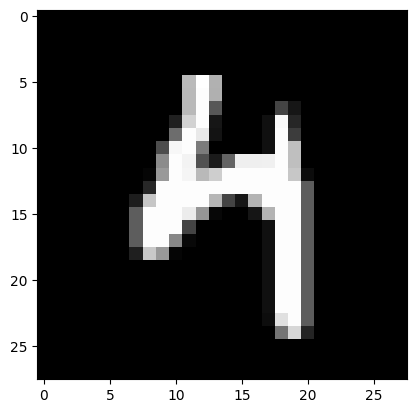

Prediction:  [[2.76598700e-07 2.20941219e-08 1.27429107e-06 1.07530626e-07
  9.99888222e-01 5.75433382e-05 2.46660937e-05 1.71633148e-06
  4.19720723e-06 2.19743632e-05]]
Predicted label:  4
Label:  4


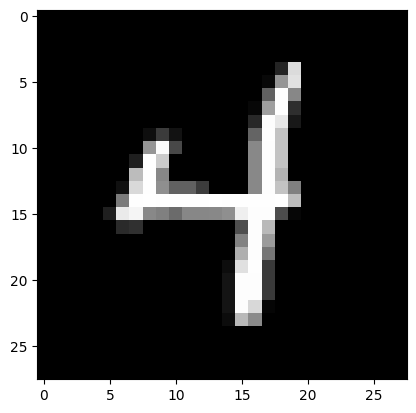

Prediction:  [[1.94999801e-08 5.19783845e-05 6.50501210e-06 9.99789944e-01
  2.84720506e-09 9.21891884e-05 3.62273680e-08 2.30548432e-05
  1.31624313e-05 2.31070782e-05]]
Predicted label:  3
Label:  3


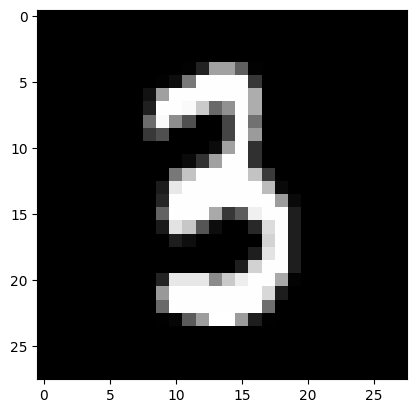

Prediction:  [[4.20121302e-07 1.18472313e-06 7.36031241e-01 1.75769310e-01
  8.49147738e-02 9.70278818e-04 1.86655127e-03 1.34623631e-06
  3.26873871e-05 4.12206891e-04]]
Predicted label:  2
Label:  2


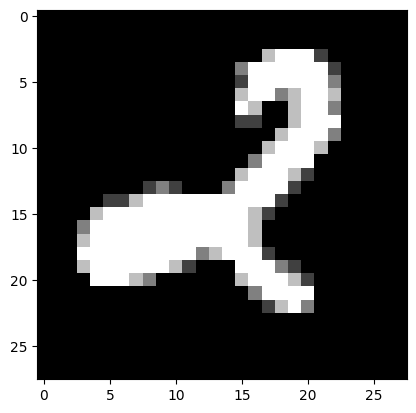

In [95]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [96]:
test_predictions = predict(X_test, W1, b1, W2, b2)
accuracy(test_predictions, y_test)

0.9069047619047619